In [1]:
from functools import partial
import pickle as pkl
import os

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import soepy

from dev_library import plot_basics_choices
from dev_library import plot_basics_wages
from dev_library import df_alignment

os.chdir("/home/peisenha/structExpectations/development/estimations/basecamp")

In [2]:
fname = "/home/peisenha/structExpectations/data-exchange-sciebo/df-observed-data-weighted-subsample.pkl"
df_obs = pd.read_pickle(fname)

In [3]:
model_params_start = pd.read_pickle("start.soepy.pkl")
model_params_start

value    upper    lower  fixed
category          name                                                       
benefits_base                             200.000000  1000.00  100.000   True
const_wage_eq     gamma_0s1                 1.734524     3.70    1.380  False
                  gamma_0s2                 2.273637     3.70    1.380  False
                  gamma_0s3                 2.134984     3.70    1.380  False
delta                                       0.980000     0.99    0.900  False
disutil_work      child_02_f                0.064536     3.00   -3.000  False
                  child_02_p                0.182351     3.00   -3.000  False
                  child_35_f               -0.129851     3.00   -3.000  False
                  child_35_p               -0.619096     3.00   -3.000  False
                  child_6orolder_f         -0.189406     3.00   -3.000  False
                  child_6orolder_p         -0.623263     3.00   -3.000  False
                  no_kids_f_educ_high       0.405765     3.00   -3.000  False
                  no_kids_f_educ_low        0.571940     3.00   -3.000  False
                  no_kids_f_educ_middle    -0.128656     3.00   -3.000  False
                  no_kids_p_educ_high      -0.285053     3.00   -3.000  False
                  no_kids_p_educ_low       -0.566743     3.00   -3.000  False
                  no_kids_p_educ_middle    -0.309465     3.00   -3.000  False
                  yes_kids_f_educ_high      1.097125     3.00   -3.000  False
                  yes_kids_f_educ_low       1.788128     3.00   -3.000  False
                  yes_kids_f_educ_middle    1.548187     3.00   -3.000  False
                  yes_kids_p_educ_high     -0.743666     3.00   -3.000  False
                  yes_kids_p_educ_low      -0.343479     3.00   -3.000  False
                  yes_kids_p_educ_middle   -0.295947     3.00   -3.000  False
exp_accm          g_s1                      0.102238     0.50    0.001  False
                  g_s2                      0.223013     0.50    0.001  False
                  g_s3                      0.261185     0.50    0.001  False
exp_accm_expected g_bar_s1                  0.570000     0.90    0.100   True
                  g_bar_s2                  0.535000     0.90    0.100   True
                  g_bar_s3                  0.625000     0.90    0.100   True
exp_deprec        delta_s1                  0.020000     0.20    0.001   True
                  delta_s2                  0.020000     0.20    0.001   True
                  delta_s3                  0.020000     0.20    0.001   True
exp_returns       gamma_1s1                 0.300524     0.50    0.001  False
                  gamma_1s2                 0.144266     0.50    0.001  False
                  gamma_1s3                 0.317441     0.50    0.001  False
hetrg_unobs       theta_f1                 -0.930271    -0.10   -3.000  False
                  theta_p1                 -0.685786    -0.10   -3.000  False
mu                                         -0.560000    -0.99   -0.010  False
sd_wage_shock     sigma_1                   0.354037     1.00    0.001  False
                  sigma_2                   0.392994     1.00    0.001  False
shares            share_1                   0.660619     0.90    0.100  False

In [4]:
df_sim_start = soepy.simulate(model_params_start, "resources/model_spec_init.yml")
df_sim_start = df_alignment(df_sim_start)
df_sim_start.to_pickle("df-sim-start.pkl")

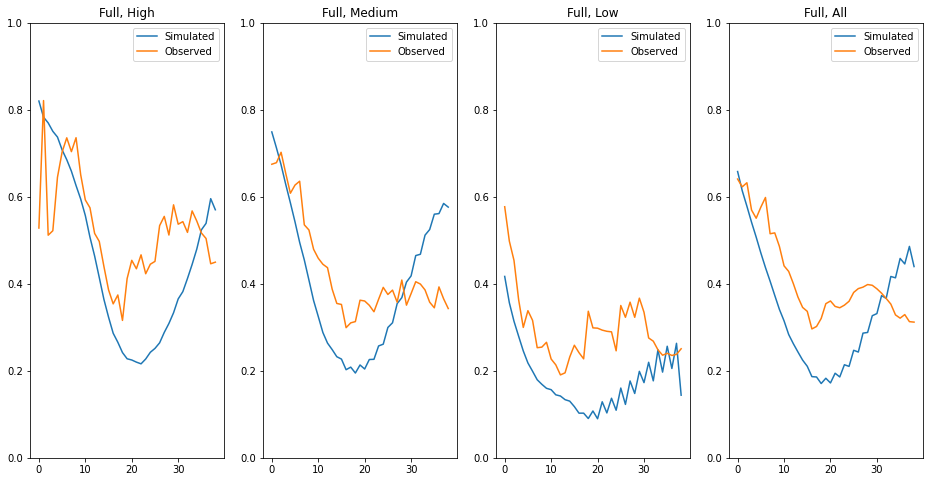

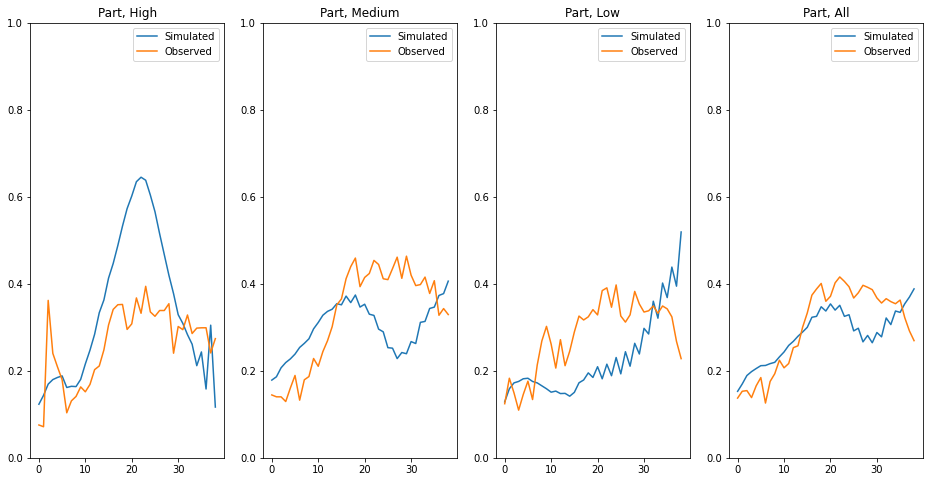

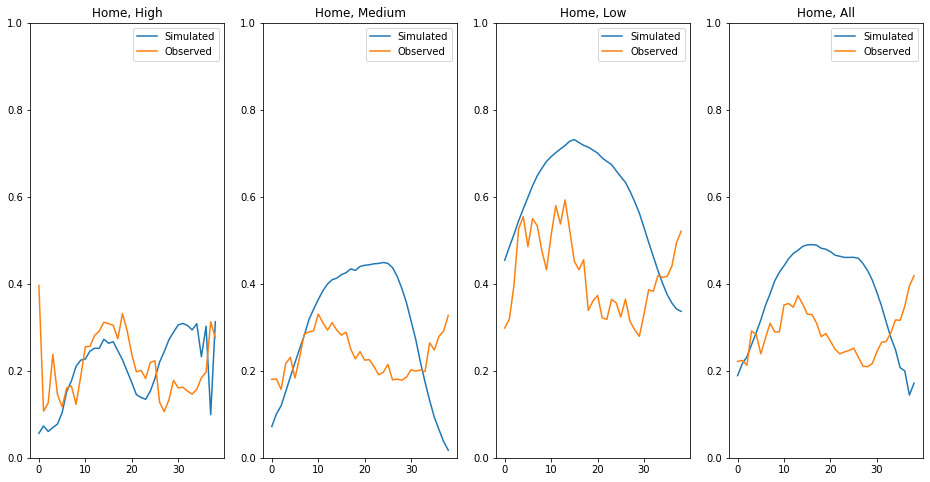

In [5]:
plot_basics_choices(df_sim=df_sim_start, df_obs=df_obs)

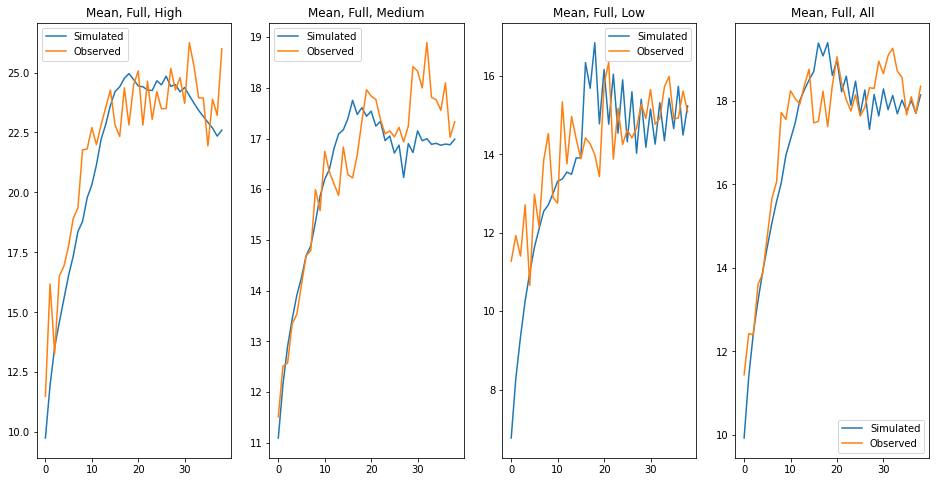

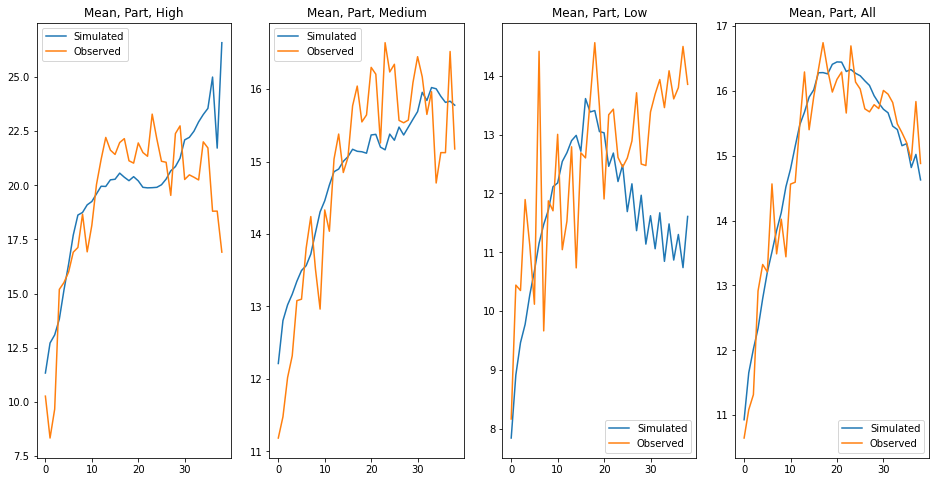

In [6]:
plot_basics_wages(df_sim=df_sim_start, df_obs=df_obs)